A stationary time series is one whose properties do not depend on the time at which the series is observed.15 Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times. On the other hand, a white noise series is stationary — it does not matter when you observe it, it should look much the same at any point in time.

Some cases can be confusing — a time series with cyclic behaviour (but with no trend or seasonality) is stationary. This is because the cycles are not of a fixed length, so before we observe the series we cannot be sure where the peaks and troughs of the cycles will be.

In general, a stationary time series will have no predictable patterns in the long-term. Time plots will show the series to be roughly horizontal (although some cyclic behaviour is possible), with constant variance.

Differencing
In Figure 8.1, note that the Google stock price was non-stationary in panel (a), but the daily changes were stationary in panel (b). This shows one way to make a non-stationary time series stationary — compute the differences between consecutive observations. This is known as differencing.

Transformations such as logarithms can help to stabilise the variance of a time series. Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

What is stationarity explain its role in time series analysis?
In the most intuitive sense, stationarity means that the statistical properties of a process generating a time series do not change over time . It does not mean that the series does not change over time, just that the way it changes does not itself change over time.

In [1]:
#%pip install download

https://medium.com/@evertongomede/forecasting-non-stationary-time-series-03b638a7cd50
https://towardsdatascience.com/how-to-remove-non-stationarity-in-time-series-forecasting-563c05c4bfc7

In [2]:
#%pip install plotly.express

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [4]:
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd

from download import download

In [5]:
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [6]:
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip', '/tmp/aq', kind="zip")

Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.


In [7]:
df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', encoding='ISO-8859-1')

In [8]:
df

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO     O3  \
0          1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0   82.0   
1          2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0   80.0   
2          3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0   79.0   
3          4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0   79.0   
4          5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0   81.0   
...      ...   ...    ...  ...   ...    ...   ...  ...  ...    ...    ...   
35059  35060  2017      2   28    19   11.0  11.0  2.0  2.0  200.0   99.0   
35060  35061  2017      2   28    20   13.0  13.0  2.0  2.0  200.0  101.0   
35061  35062  2017      2   28    21    9.0  14.0  2.0  2.0  200.0  102.0   
35062  35063  2017      2   28    22   10.0  12.0  2.0  2.0  200.0   97.0   
35063  35064  2017      2   28    23   13.0  16.0  4.0  9.0  500.0   74.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0      -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
1      -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2      -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3      -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4      -3.5  1022.3 -19.4   0.0    N   2.1  Dingling  
...     ...     ...   ...   ...  ...   ...       ...  
35059  11.7  1008.9 -13.3   0.0  NNE   1.3  Dingling  
35060  10.9  1009.0 -14.0   0.0    N   2.1  Dingling  
35061   9.5  1009.4 -13.0   0.0    N   1.5  Dingling  
35062   7.8  1009.6 -12.6   0.0   NW   1.4  Dingling  
35063   7.0  1009.4 -12.2   0.0    N   1.9  Dingling  

[35064 rows x 18 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [10]:
def convert_to_date(y,m,d,h):
	x=y+m+d+" " + h
	return datetime.strptime(x,"%y %m %d %H")

In [11]:
def convert_to_date(x):
	return datetime.strptime(x, '%Y %m %d %H')

In [12]:
df2 = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)

In [13]:
df2

year_month_day_hour     No  year month day hour  PM2.5  PM10  SO2  NO2  \
0     2013-03-01 00:00:00      1  2013     3   1    0    4.0   4.0  3.0  NaN   
1     2013-03-01 01:00:00      2  2013     3   1    1    7.0   7.0  3.0  NaN   
2     2013-03-01 02:00:00      3  2013     3   1    2    5.0   5.0  3.0  2.0   
3     2013-03-01 03:00:00      4  2013     3   1    3    6.0   6.0  3.0  NaN   
4     2013-03-01 04:00:00      5  2013     3   1    4    5.0   5.0  3.0  NaN   
...                   ...    ...   ...   ...  ..  ...    ...   ...  ...  ...   
35059 2017-02-28 19:00:00  35060  2017     2  28   19   11.0  11.0  2.0  2.0   
35060 2017-02-28 20:00:00  35061  2017     2  28   20   13.0  13.0  2.0  2.0   
35061 2017-02-28 21:00:00  35062  2017     2  28   21    9.0  14.0  2.0  2.0   
35062 2017-02-28 22:00:00  35063  2017     2  28   22   10.0  12.0  2.0  2.0   
35063 2017-02-28 23:00:00  35064  2017     2  28   23   13.0  16.0  4.0  9.0   

          CO     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0      200.0   82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
1      200.0   80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2      200.0   79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3      200.0   79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4      200.0   81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling  
...      ...    ...   ...     ...   ...   ...  ...   ...       ...  
35059  200.0   99.0  11.7  1008.9 -13.3   0.0  NNE   1.3  Dingling  
35060  200.0  101.0  10.9  1009.0 -14.0   0.0    N   2.1  Dingling  
35061  200.0  102.0   9.5  1009.4 -13.0   0.0    N   1.5  Dingling  
35062  200.0   97.0   7.8  1009.6 -12.6   0.0   NW   1.4  Dingling  
35063  500.0   74.0   7.0  1009.4 -12.2   0.0    N   1.9  Dingling  

[35064 rows x 19 columns]

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

In [15]:
df2.describe()

No         PM2.5          PM10           SO2           NO2  \
count  35064.000000  34285.000000  34408.000000  34334.000000  33830.000000   
mean   17532.500000     65.989497     83.739723     11.749650     27.585467   
std    10122.249256     72.267723     79.541685     15.519259     26.383882   
min        1.000000      3.000000      2.000000      0.285600      1.026500   
25%     8766.750000     14.000000     26.000000      2.000000      9.000000   
50%    17532.500000     41.000000     60.000000      5.000000     19.000000   
75%    26298.250000     93.000000    117.000000     15.000000     38.000000   
max    35064.000000    881.000000    905.000000    156.000000    205.000000   

                 CO            O3          TEMP          PRES          DEWP  \
count  33052.000000  33850.000000  35011.000000  35014.000000  35011.000000   
mean     904.896073     68.548371     13.686111   1007.760278      1.505495   
std      903.306220     53.764424     11.365313     10.225664     13.822099   
min      100.000000      0.214200    -16.600000    982.400000    -35.100000   
25%      300.000000     31.000000      3.400000    999.300000    -10.200000   
50%      600.000000     61.000000     14.700000   1007.400000      1.800000   
75%     1200.000000     90.000000     23.300000   1016.000000     14.200000   
max    10000.000000    500.000000     41.400000   1036.500000     27.200000   

               RAIN          WSPM  
count  35013.000000  35021.000000  
mean       0.060366      1.853836  
std        0.752899      1.309808  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        0.000000      1.500000  
75%        0.000000      2.300000  
max       52.100000     10.000000

In [16]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [17]:
print("Rows",df2.shape[0])
print("Columns",df2.shape[1])
print("\nFeatures:\n",df2.columns.tolist())
print('\nMissing Values\n', df2.isnull().any())
print("\nUnique Values\n",df2.nunique())


Rows 35064
Columns 19

Features:
 ['year_month_day_hour', 'No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

Missing Values
 year_month_day_hour    False
No                     False
year                   False
month                  False
day                    False
hour                   False
PM2.5                   True
PM10                    True
SO2                     True
NO2                     True
CO                      True
O3                      True
TEMP                    True
PRES                    True
DEWP                    True
RAIN                    True
wd                      True
WSPM                    True
station                False
dtype: bool

Unique Values
 year_month_day_hour    35064
No                     35064
year                       5
month                     12
day                       31
hour                      24
PM2.5                    486
PM10 

In [18]:
df2_nonIndex=df2.copy()
df3=df2.copy()

In [19]:
df3.set_index('year_month_day_hour',inplace=True)
df3

No  year month day hour  PM2.5  PM10  SO2  NO2     CO  \
year_month_day_hour                                                             
2013-03-01 00:00:00      1  2013     3   1    0    4.0   4.0  3.0  NaN  200.0   
2013-03-01 01:00:00      2  2013     3   1    1    7.0   7.0  3.0  NaN  200.0   
2013-03-01 02:00:00      3  2013     3   1    2    5.0   5.0  3.0  2.0  200.0   
2013-03-01 03:00:00      4  2013     3   1    3    6.0   6.0  3.0  NaN  200.0   
2013-03-01 04:00:00      5  2013     3   1    4    5.0   5.0  3.0  NaN  200.0   
...                    ...   ...   ...  ..  ...    ...   ...  ...  ...    ...   
2017-02-28 19:00:00  35060  2017     2  28   19   11.0  11.0  2.0  2.0  200.0   
2017-02-28 20:00:00  35061  2017     2  28   20   13.0  13.0  2.0  2.0  200.0   
2017-02-28 21:00:00  35062  2017     2  28   21    9.0  14.0  2.0  2.0  200.0   
2017-02-28 22:00:00  35063  2017     2  28   22   10.0  12.0  2.0  2.0  200.0   
2017-02-28 23:00:00  35064  2017     2  28   23   13.0  16.0  4.0  9.0  500.0   

                        O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
year_month_day_hour                                                        
2013-03-01 00:00:00   82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
2013-03-01 01:00:00   80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2013-03-01 02:00:00   79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
2013-03-01 03:00:00   79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
2013-03-01 04:00:00   81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling  
...                    ...   ...     ...   ...   ...  ...   ...       ...  
2017-02-28 19:00:00   99.0  11.7  1008.9 -13.3   0.0  NNE   1.3  Dingling  
2017-02-28 20:00:00  101.0  10.9  1009.0 -14.0   0.0    N   2.1  Dingling  
2017-02-28 21:00:00  102.0   9.5  1009.4 -13.0   0.0    N   1.5  Dingling  
2017-02-28 22:00:00   97.0   7.8  1009.6 -12.6   0.0   NW   1.4  Dingling  
2017-02-28 23:00:00   74.0   7.0  1009.4 -12.2   0.0    N   1.9  Dingling  

[35064 rows x 18 columns]

In [20]:
df3['month']=df3['month'].astype(int)
df3.isnull().sum()
df3

No  year  month day hour  PM2.5  PM10  SO2  NO2  \
year_month_day_hour                                                       
2013-03-01 00:00:00      1  2013      3   1    0    4.0   4.0  3.0  NaN   
2013-03-01 01:00:00      2  2013      3   1    1    7.0   7.0  3.0  NaN   
2013-03-01 02:00:00      3  2013      3   1    2    5.0   5.0  3.0  2.0   
2013-03-01 03:00:00      4  2013      3   1    3    6.0   6.0  3.0  NaN   
2013-03-01 04:00:00      5  2013      3   1    4    5.0   5.0  3.0  NaN   
...                    ...   ...    ...  ..  ...    ...   ...  ...  ...   
2017-02-28 19:00:00  35060  2017      2  28   19   11.0  11.0  2.0  2.0   
2017-02-28 20:00:00  35061  2017      2  28   20   13.0  13.0  2.0  2.0   
2017-02-28 21:00:00  35062  2017      2  28   21    9.0  14.0  2.0  2.0   
2017-02-28 22:00:00  35063  2017      2  28   22   10.0  12.0  2.0  2.0   
2017-02-28 23:00:00  35064  2017      2  28   23   13.0  16.0  4.0  9.0   

                        CO     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                      
2013-03-01 00:00:00  200.0   82.0  -2.3  1020.8 -19.7   0.0    E   0.5   
2013-03-01 01:00:00  200.0   80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7   
2013-03-01 02:00:00  200.0   79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2   
2013-03-01 03:00:00  200.0   79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0   
2013-03-01 04:00:00  200.0   81.0  -3.5  1022.3 -19.4   0.0    N   2.1   
...                    ...    ...   ...     ...   ...   ...  ...   ...   
2017-02-28 19:00:00  200.0   99.0  11.7  1008.9 -13.3   0.0  NNE   1.3   
2017-02-28 20:00:00  200.0  101.0  10.9  1009.0 -14.0   0.0    N   2.1   
2017-02-28 21:00:00  200.0  102.0   9.5  1009.4 -13.0   0.0    N   1.5   
2017-02-28 22:00:00  200.0   97.0   7.8  1009.6 -12.6   0.0   NW   1.4   
2017-02-28 23:00:00  500.0   74.0   7.0  1009.4 -12.2   0.0    N   1.9   

                      station  
year_month_day_hour            
2013-03-01 00:00:00  Dingling  
2013-03-01 01:00:00  Dingling  
2013-03-01 02:00:00  Dingling  
2013-03-01 03:00:00  Dingling  
2013-03-01 04:00:00  Dingling  
...                       ...  
2017-02-28 19:00:00  Dingling  
2017-02-28 20:00:00  Dingling  
2017-02-28 21:00:00  Dingling  
2017-02-28 22:00:00  Dingling  
2017-02-28 23:00:00  Dingling  

[35064 rows x 18 columns]

In [21]:
df3.loc['2013-03-01':'2013-03-05']

No  year  month day hour  PM2.5   PM10   SO2   NO2  \
year_month_day_hour                                                        
2013-03-01 00:00:00    1  2013      3   1    0    4.0    4.0   3.0   NaN   
2013-03-01 01:00:00    2  2013      3   1    1    7.0    7.0   3.0   NaN   
2013-03-01 02:00:00    3  2013      3   1    2    5.0    5.0   3.0   2.0   
2013-03-01 03:00:00    4  2013      3   1    3    6.0    6.0   3.0   NaN   
2013-03-01 04:00:00    5  2013      3   1    4    5.0    5.0   3.0   NaN   
...                  ...   ...    ...  ..  ...    ...    ...   ...   ...   
2013-03-05 19:00:00  116  2013      3   5   19  179.0  200.0  50.0  96.0   
2013-03-05 20:00:00  117  2013      3   5   20  172.0  180.0  43.0  94.0   
2013-03-05 21:00:00  118  2013      3   5   21  179.0  191.0  38.0  80.0   
2013-03-05 22:00:00  119  2013      3   5   22  173.0  168.0  39.0  73.0   
2013-03-05 23:00:00  120  2013      3   5   23  170.0  162.0  42.0  72.0   

                         CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                      
2013-03-01 00:00:00   200.0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5   
2013-03-01 01:00:00   200.0  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7   
2013-03-01 02:00:00   200.0  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2   
2013-03-01 03:00:00   200.0  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0   
2013-03-01 04:00:00   200.0  81.0  -3.5  1022.3 -19.4   0.0    N   2.1   
...                     ...   ...   ...     ...   ...   ...  ...   ...   
2013-03-05 19:00:00  1600.0  82.0   7.7  1005.4  -7.6   0.0  NNE   0.2   
2013-03-05 20:00:00  1899.0  82.0   6.3  1005.9  -7.3   0.0  NNE   0.7   
2013-03-05 21:00:00  1700.0  82.0   5.6  1006.0  -7.3   0.0  NNE   0.2   
2013-03-05 22:00:00  1800.0  82.0   4.9  1005.8  -7.0   0.0    N   1.7   
2013-03-05 23:00:00  1700.0  82.0   3.7  1005.7  -6.9   0.0   NE   0.4   

                      station  
year_month_day_hour            
2013-03-01 00:00:00  Dingling  
2013-03-01 01:00:00  Dingling  
2013-03-01 02:00:00  Dingling  
2013-03-01 03:00:00  Dingling  
2013-03-01 04:00:00  Dingling  
...                       ...  
2013-03-05 19:00:00  Dingling  
2013-03-05 20:00:00  Dingling  
2013-03-05 21:00:00  Dingling  
2013-03-05 22:00:00  Dingling  
2013-03-05 23:00:00  Dingling  

[120 rows x 18 columns]

In [22]:
df3.loc['2013':'2015']

No  year  month day hour  PM2.5   PM10   SO2   NO2  \
year_month_day_hour                                                          
2013-03-01 00:00:00      1  2013      3   1    0    4.0    4.0   3.0   NaN   
2013-03-01 01:00:00      2  2013      3   1    1    7.0    7.0   3.0   NaN   
2013-03-01 02:00:00      3  2013      3   1    2    5.0    5.0   3.0   2.0   
2013-03-01 03:00:00      4  2013      3   1    3    6.0    6.0   3.0   NaN   
2013-03-01 04:00:00      5  2013      3   1    4    5.0    5.0   3.0   NaN   
...                    ...   ...    ...  ..  ...    ...    ...   ...   ...   
2015-12-31 19:00:00  24860  2015     12  31   19   85.0   95.0  12.0  73.0   
2015-12-31 20:00:00  24861  2015     12  31   20    NaN  109.0  32.0  79.0   
2015-12-31 21:00:00  24862  2015     12  31   21   80.0  100.0  35.0  81.0   
2015-12-31 22:00:00  24863  2015     12  31   22   93.0   93.0  28.0  76.0   
2015-12-31 23:00:00  24864  2015     12  31   23   98.0   98.0  25.0  75.0   

                         CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                      
2013-03-01 00:00:00   200.0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5   
2013-03-01 01:00:00   200.0  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7   
2013-03-01 02:00:00   200.0  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2   
2013-03-01 03:00:00   200.0  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0   
2013-03-01 04:00:00   200.0  81.0  -3.5  1022.3 -19.4   0.0    N   2.1   
...                     ...   ...   ...     ...   ...   ...  ...   ...   
2015-12-31 19:00:00  1200.0   2.0  -0.6  1021.0  -9.5   0.0   NE   0.6   
2015-12-31 20:00:00  2900.0   2.0  -1.8  1021.2  -9.9   0.0   NW   1.1   
2015-12-31 21:00:00  3200.0   2.0  -1.6  1020.8  -9.7   0.0   NE   0.9   
2015-12-31 22:00:00  3500.0   2.0  -2.9  1020.4  -9.8   0.0  NNW   1.3   
2015-12-31 23:00:00  3600.0   2.0  -3.5  1020.2  -9.7   0.0  NNW   1.3   

                      station  
year_month_day_hour            
2013-03-01 00:00:00  Dingling  
2013-03-01 01:00:00  Dingling  
2013-03-01 02:00:00  Dingling  
2013-03-01 03:00:00  Dingling  
2013-03-01 04:00:00  Dingling  
...                       ...  
2015-12-31 19:00:00  Dingling  
2015-12-31 20:00:00  Dingling  
2015-12-31 21:00:00  Dingling  
2015-12-31 22:00:00  Dingling  
2015-12-31 23:00:00  Dingling  

[24864 rows x 18 columns]

In [23]:
df_pm=df3['PM2.5']
df_pm

year_month_day_hour
2013-03-01 00:00:00     4.0
2013-03-01 01:00:00     7.0
2013-03-01 02:00:00     5.0
2013-03-01 03:00:00     6.0
2013-03-01 04:00:00     5.0
                       ... 
2017-02-28 19:00:00    11.0
2017-02-28 20:00:00    13.0
2017-02-28 21:00:00     9.0
2017-02-28 22:00:00    10.0
2017-02-28 23:00:00    13.0
Name: PM2.5, Length: 35064, dtype: float64

<AxesSubplot:xlabel='year_month_day_hour'>

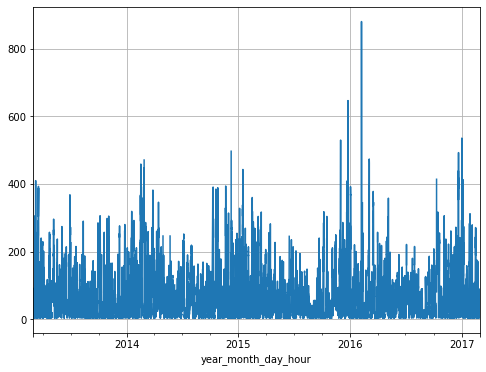

In [24]:
df_pm.plot(grid=True)

<AxesSubplot:xlabel='year_month_day_hour'>

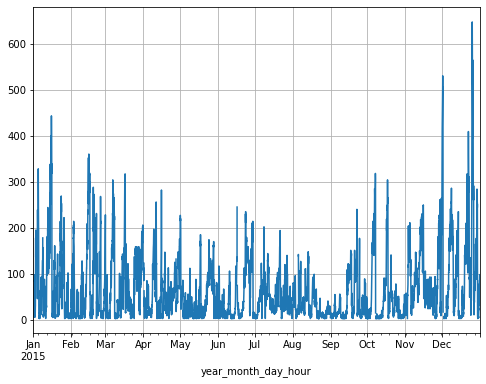

In [25]:
df_pm.loc['2015'].plot(grid=True)


<AxesSubplot:xlabel='year_month_day_hour'>

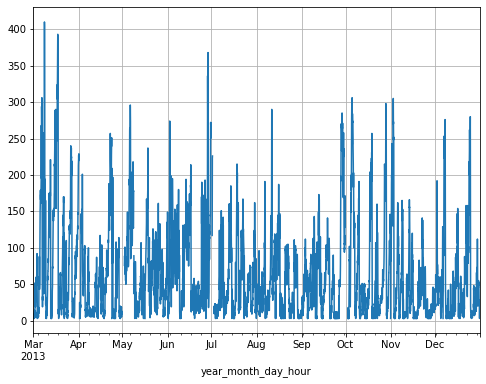

In [26]:

df_pm.loc['2013'].plot(grid=True)

<AxesSubplot:xlabel='year_month_day_hour'>

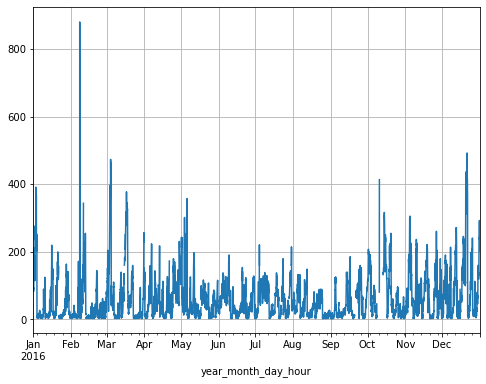

In [27]:
df_pm.loc['2016'].plot(grid=True)

In [28]:
import plotly.express as px

In [29]:
fig=px.line(df2,  y= 'PM2.5', x='year_month_day_hour',title='PM2.5 with slider')
fig.update_xaxes(rangeslider_visible = True)
fig.show()

In [37]:
fig=px.line(df2, x='year_month_day_hour',y='PM2.5',title='PM2.5 with slider')
fig.update_xaxes(rangeslider_visible = True,
                rangeselector = dict(buttons = list([
                        dict(count=1, label='1y',step='year', stepmode='backward'),
                        dict(count=2, label='2y',step='year', stepmode='backward'),
                        dict(count=3, label='3y',step='year', stepmode='backward'),
                        dict(step='all')])))
fig.show()


In [85]:
df3['month']=df3['month'].astype(int)

Text(0.5, 1.0, 'Air quality plot for the year 2014, 2015 and 2016')

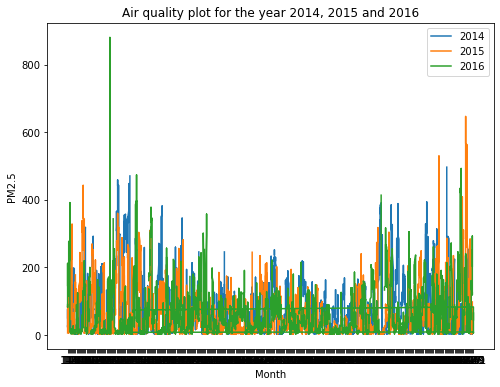

In [97]:
df_2014=df3.loc['2014'].reset_index()
df_2014['month_day_hour'] = df_2014.apply(lambda x: str(x['month'])+"-"+x['day'],axis=1)
plt.plot(df_2014['month_day_hour'],df_2014['PM2.5'])
df_2015=df3.loc['2015'].reset_index()
df_2015['month_day_hour'] = df_2015.apply(lambda x: str(x['month'])+"-"+x['day'],axis=1)
plt.plot(df_2015['month_day_hour'],df_2015['PM2.5'])
df_2016=df3.loc['2016'].reset_index()
df_2016['month_day_hour'] = df_2016.apply(lambda x: str(x['month'])+"-"+x['day'],axis=1)
plt.plot(df_2016['month_day_hour'],df_2016['PM2.5'])
plt.legend(['2014','2015','2016'])
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.title('Air quality plot for the year 2014, 2015 and 2016')

In [110]:
df3.loc['2014':'2016'][['month','PM2.5','TEMP']].groupby('month').describe()

PM2.5                                                           TEMP  \
        count       mean         std  min   25%   50%     75%    max   count   
month                                                                          
1      2173.0  70.285274   75.913587  3.0  12.0  38.0  113.00  443.0  2229.0   
2      1978.0  86.389282  105.603069  3.0  10.0  33.0  132.00  881.0  2011.0   
3      2212.0  80.193852   87.889440  3.0  13.0  47.0  123.25  474.0  2231.0   
4      2105.0  67.963325   56.430235  3.0  25.0  54.0   95.00  346.0  2160.0   
5      2188.0  47.994378   44.843130  3.0  16.0  35.0   67.00  358.0  2232.0   
6      2119.0  46.655403   43.877349  3.0  13.0  31.0   69.00  245.0  2160.0   
7      2205.0  61.671474   50.926149  3.0  21.0  48.0   91.00  252.0  2232.0   
8      2206.0  41.364869   37.279312  3.0  13.0  29.0   60.00  217.0  2232.0   
9      2074.0  45.356123   43.235331  3.0  11.0  27.0   78.00  240.0  2153.0   
10     2081.0  82.586257   92.234361  3.0  13.0  43.0  124.00  414.0  2232.0   
11     2141.0  77.500140   71.720648  3.0  20.0  56.0  112.00  394.0  2160.0   
12     2186.0  87.990851  104.677021  3.0  11.0  48.5  135.00  647.0  2232.0   

                                                          
            mean       std   min   25%   50%   75%   max  
month                                                     
1      -1.594616  4.513169 -16.6  -4.6  -1.6   1.5  12.4  
2       0.861810  4.309023 -10.9  -2.0   1.0   3.8  14.0  
3       9.229352  6.531500  -6.4   4.3   9.1  14.1  26.0  
4      16.445741  5.553230   1.3  12.5  16.2  20.2  32.0  
5      21.493414  6.078441   7.0  17.3  21.4  25.9  41.4  
6      25.038287  4.534105  15.1  21.5  24.8  28.4  38.1  
7      27.239471  3.977007  16.8  24.2  27.0  30.3  39.2  
8      26.593414  4.104480  16.6  23.3  26.3  29.9  36.3  
9      20.857568  4.535383   7.8  17.6  20.5  23.9  34.5  
10     13.624937  4.860365  -1.4  10.4  13.6  16.6  28.1  
11      4.564444  5.227741 -10.3   1.3   4.6   7.8  20.8  
12     -0.146505  3.680166  -9.7  -2.8  -0.3   2.2  11.6

In [104]:
df3.loc['2014':'2016'][['month','PM2.5','TEMP']].groupby('month').agg({'PM2.5':['max'],'TEMP':['min','max']})

PM2.5  TEMP      
         max   min   max
month                   
1      443.0 -16.6  12.4
2      881.0 -10.9  14.0
3      474.0  -6.4  26.0
4      346.0   1.3  32.0
5      358.0   7.0  41.4
6      245.0  15.1  38.1
7      252.0  16.8  39.2
8      217.0  16.6  36.3
9      240.0   7.8  34.5
10     414.0  -1.4  28.1
11     394.0 -10.3  20.8
12     647.0  -9.7  11.6

array([<AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>], dtype=object)

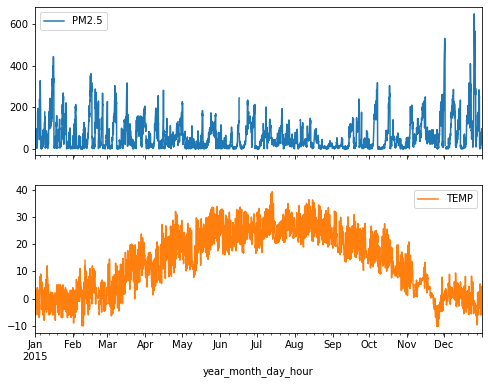

In [119]:
t1=df3.loc['2015'][['PM2.5','TEMP']]
t1.plot(subplots=True)

array([[<AxesSubplot:title={'center':'PM2.5'}>,
        <AxesSubplot:title={'center':'TEMP'}>]], dtype=object)

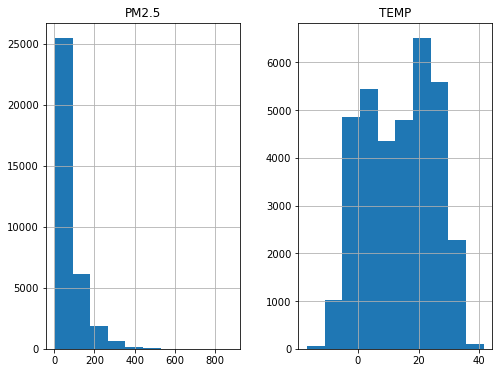

In [115]:
df3[['PM2.5','TEMP']].hist()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

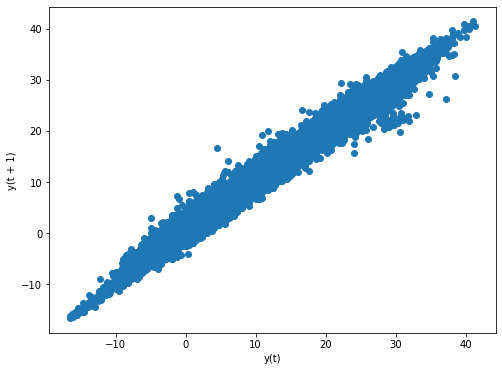

In [120]:
pd.plotting.lag_plot(df3['TEMP'],lag=1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 100)'>

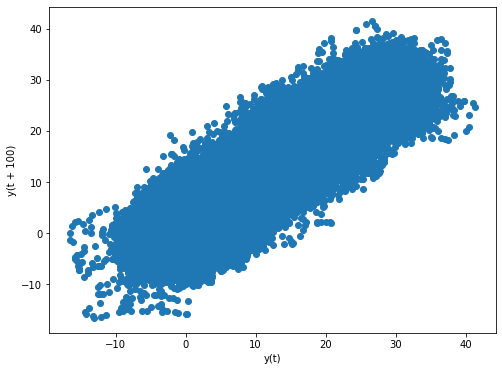

In [121]:
pd.plotting.lag_plot(df3['TEMP'],lag=100)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 4321)'>

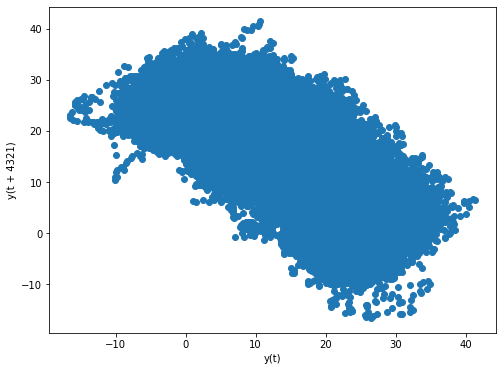

In [122]:
pd.plotting.lag_plot(df3['TEMP'],lag=4321)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 2150)'>

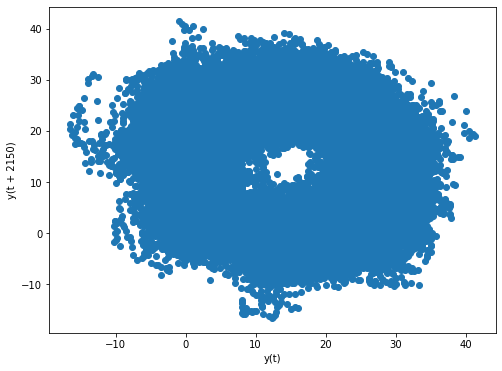

In [123]:
pd.plotting.lag_plot(df3['TEMP'],lag=2150)

array([<AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>], dtype=object)

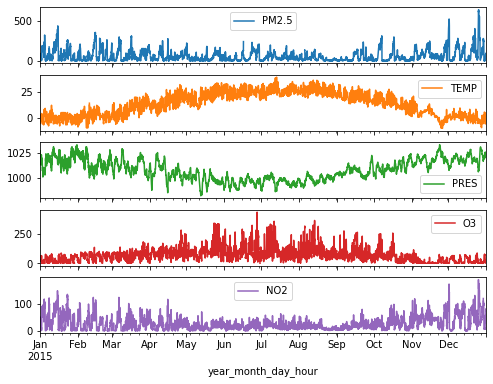

In [126]:
t2=df3.loc['2015'][['PM2.5','TEMP','PRES','O3','NO2']]
t2.plot(subplots=True)

In [127]:
df3.isnull().any()

No         False
year       False
month      False
day        False
hour       False
PM2.5       True
PM10        True
SO2         True
NO2         True
CO          True
O3          True
TEMP        True
PRES        True
DEWP        True
RAIN        True
wd          True
WSPM        True
station    False
dtype: bool

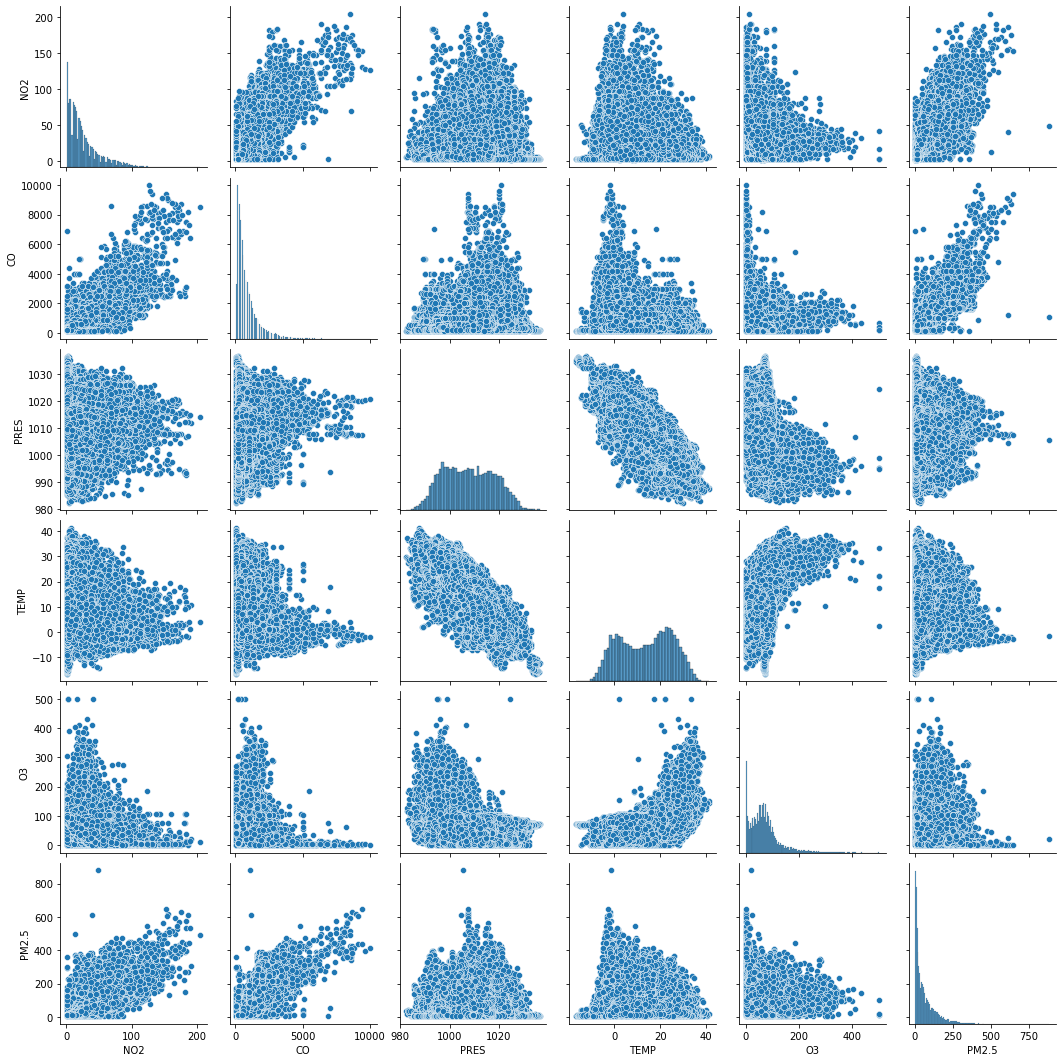

In [129]:
sns.pairplot(df3[['NO2','CO','PRES','TEMP','O3','PM2.5']])

In [139]:
df3_corr=df3[['NO2','CO','PRES','TEMP','O3','PM2.5']].corr(method='pearson')
df3_corr

NO2        CO      PRES      TEMP        O3     PM2.5
NO2    1.000000  0.798753  0.200609 -0.316337 -0.373625  0.718170
CO     0.798753  1.000000  0.172220 -0.282312 -0.303275  0.802737
PRES   0.200609  0.172220  1.000000 -0.837844 -0.457838 -0.008005
TEMP  -0.316337 -0.282312 -0.837844  1.000000  0.589474 -0.089939
O3    -0.373625 -0.303275 -0.457838  0.589474  1.000000 -0.100542
PM2.5  0.718170  0.802737 -0.008005 -0.089939 -0.100542  1.000000

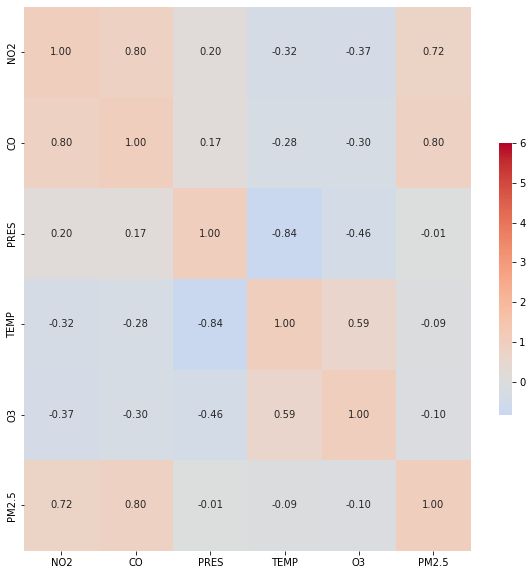

In [143]:
g=sns.heatmap(df3_corr, vmax=6,center=0,cbar_kws={"shrink": .5}, annot=True,fmt='.2f',cmap='coolwarm')
g.figure.set_size_inches(10,10)
plt.show()

In [146]:
df3.groupby('wd').agg(mean=('PM2.5','mean'),median=('PM2.5','median'),max=('PM2.5','max'),min=('PM2.5','min')).reset_index()

wd       mean  median    max  min
0     E  88.623363    70.0  434.0  3.0
1   ENE  77.685514    56.5  647.0  3.0
2   ESE  96.492276    78.5  632.0  3.0
3     N  57.546221    29.0  536.0  3.0
4    NE  57.390083    32.0  530.0  3.0
5   NNE  53.946239    26.0  881.0  3.0
6   NNW  62.790775    33.0  548.0  3.0
7    NW  52.769116    21.0  535.0  3.0
8     S  72.497281    52.0  511.0  3.0
9    SE  85.045709    70.0  617.0  3.0
10  SSE  79.925967    61.0  614.0  3.0
11  SSW  73.078253    50.0  493.0  3.0
12   SW  70.233140    46.0  459.0  3.0
13    W  49.488104    22.0  446.0  3.0
14  WNW  37.307447    14.0  515.0  3.0
15  WSW  66.725926    39.0  451.0  3.0

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

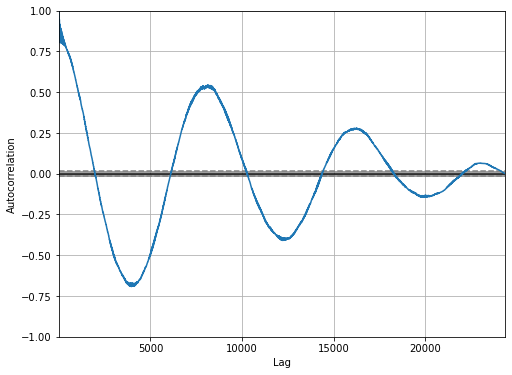

In [154]:
pd.plotting.autocorrelation_plot(df3na['2014':'2016']['TEMP'])

In [153]:
df3na=df3.dropna()
df3na

No  year  month day hour  PM2.5  PM10  SO2  NO2  \
year_month_day_hour                                                       
2013-03-01 02:00:00      3  2013      3   1    2    5.0   5.0  3.0  2.0   
2013-03-01 05:00:00      6  2013      3   1    5    6.0   6.0  3.0  4.0   
2013-03-01 06:00:00      7  2013      3   1    6    5.0  10.0  3.0  4.0   
2013-03-01 07:00:00      8  2013      3   1    7    5.0   6.0  3.0  2.0   
2013-03-01 08:00:00      9  2013      3   1    8    8.0   7.0  3.0  3.0   
...                    ...   ...    ...  ..  ...    ...   ...  ...  ...   
2017-02-28 19:00:00  35060  2017      2  28   19   11.0  11.0  2.0  2.0   
2017-02-28 20:00:00  35061  2017      2  28   20   13.0  13.0  2.0  2.0   
2017-02-28 21:00:00  35062  2017      2  28   21    9.0  14.0  2.0  2.0   
2017-02-28 22:00:00  35063  2017      2  28   22   10.0  12.0  2.0  2.0   
2017-02-28 23:00:00  35064  2017      2  28   23   13.0  16.0  4.0  9.0   

                        CO     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                      
2013-03-01 02:00:00  200.0   79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2   
2013-03-01 05:00:00  200.0   79.0  -4.5  1022.6 -19.5   0.0  NNW   1.7   
2013-03-01 06:00:00  200.0   77.0  -4.5  1023.4 -19.5   0.0  NNW   1.8   
2013-03-01 07:00:00  200.0   80.0  -2.1  1024.6 -20.0   0.0   NW   2.5   
2013-03-01 08:00:00  200.0   79.0  -0.2  1025.2 -20.5   0.0  NNW   2.8   
...                    ...    ...   ...     ...   ...   ...  ...   ...   
2017-02-28 19:00:00  200.0   99.0  11.7  1008.9 -13.3   0.0  NNE   1.3   
2017-02-28 20:00:00  200.0  101.0  10.9  1009.0 -14.0   0.0    N   2.1   
2017-02-28 21:00:00  200.0  102.0   9.5  1009.4 -13.0   0.0    N   1.5   
2017-02-28 22:00:00  200.0   97.0   7.8  1009.6 -12.6   0.0   NW   1.4   
2017-02-28 23:00:00  500.0   74.0   7.0  1009.4 -12.2   0.0    N   1.9   

                      station  
year_month_day_hour            
2013-03-01 02:00:00  Dingling  
2013-03-01 05:00:00  Dingling  
2013-03-01 06:00:00  Dingling  
2013-03-01 07:00:00  Dingling  
2013-03-01 08:00:00  Dingling  
...                       ...  
2017-02-28 19:00:00  Dingling  
2017-02-28 20:00:00  Dingling  
2017-02-28 21:00:00  Dingling  
2017-02-28 22:00:00  Dingling  
2017-02-28 23:00:00  Dingling  

[31306 rows x 18 columns]

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

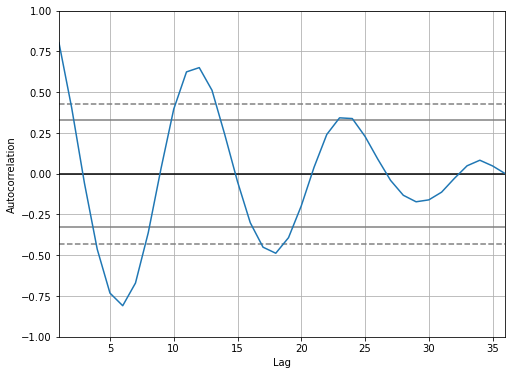

In [157]:
pd.plotting.autocorrelation_plot(df3na['2014':'2016']['TEMP'].resample('1m').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

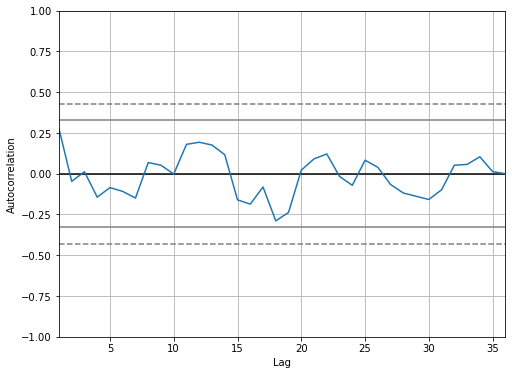

In [159]:
pd.plotting.autocorrelation_plot(df3na['2014':'2016']['PM2.5'].resample('1m').mean())